In [1]:
# - KMeans는 평균을 자동으로 구해줍니다.
# - 평균값은 클러스터의 중심에 위치
# - 점진적으로 가장 가까운 샘플의 중심으로 이동하면서 클러스터를 구성
# - 샘플의 가장 중심점에 다다르면, 해당 클러스터들을 해당 샘플소속으로 정함

# <단점>
# - 클러스터 갯수를 사전에 지정해야 합니다.
# - 실전에서는 몇개의 클러스터가 있는지 알 수 없기 때문에
#   적절한 K값을 찾아야 합니다.

# KMeans 작동방식
# 1. 샘플들중에 무작위로 k개의 클러스터 중심을 정한다.
# 2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아서
#    해당 클러스터의 샘플로 지정
# 3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심 변경
# 4. 클러스터 중심에 변화가 없을 때까지 2번부터 반복 수행

In [2]:
import numpy as np

In [8]:
### 과일 이미지 데이터 불러들이기
fruits = np.load('./09_fruits_300.npy')
print(fruits)

[[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 ...

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]]]


In [9]:
### 2차원 데이터로 변환
# - 3행 10000열
fruits_2d = fruits.reshape(-1, 100 * 100 )
print(fruits_2d.shape)

(300, 10000)


In [43]:
### KMeans 클래스(모델) 생성하기
# 사용패키지 : sklearn.cluster
# 사용클래스(모델) : KMeans

from sklearn.cluster import KMeans

# n_clusters : 클러스터 갯수
km = KMeans(n_clusters=4, random_state = 42)


# 훈련모델 생성하기
km.fit(fruits_2d)

print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2, 3]), array([ 90,  35, 111,  64], dtype=int64))


In [44]:
### 군집결과 확인하기
# - labels_ : 훈련에 의해 군집된 결과를 확인하는 파라미터
# - 객체 생성시 클러스터 갯수 만큼의 레이블(이름)이 만들어진다.
# - 클러스터 0, 1, 2라는 레이블이 자동으로 만들어 집니다.
# - labels_ 배열의 갯수는 샘플갯수 300개 행의 갯수와 동일
# - 레이블 0-2의 순서는 어떤 의미도 없음
print(km.labels_)

[0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 1 3 3 1 3 3 3 3 3 3 1 3 3 3 3 3 1 3 3
 1 1 3 1 1 3 1 3 3 1 1 3 3 3 3 3 1 3 3 3 3 1 1 3 1 3 1 3 1 3 1 3 3 1 3 3 3
 3 3 3 3 1 1 1 1 3 1 1 1 3 3 2 3 3 1 3 3 3 1 3 3 1 3 3 3 3 3 1 1 3 1 3 3 3
 3 1 3 3]


In [45]:
## 클러스터 0, 1, 2가 클러스터한 갯수 확인하기
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2, 3]), array([ 90,  35, 111,  64], dtype=int64))


In [46]:
# 테스트 방법 넣어서 맞추면 잘하는거 못맞추면 못하는거

In [47]:
import matplotlib.pyplot as plt

### 3개 클러스터를 각각 테스트하기 위하여 이미지 출력 함수 생성

def draw_fruits(arr, ratio = 1) :
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    
    fig, axs = plt.subplots(rows, cols,
                            figsize = (cols * ratio, rows*ratio),
                            squeeze = False)
    
    for i in range(rows) :
        for j in range(cols):
            if i*10+j < n:
                axs[i , j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
            
    plt.show()

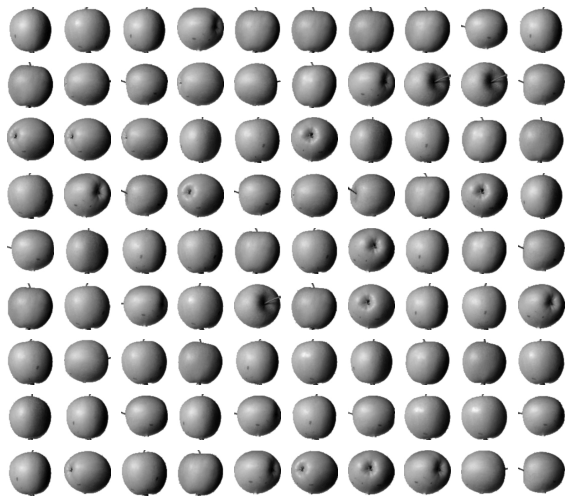

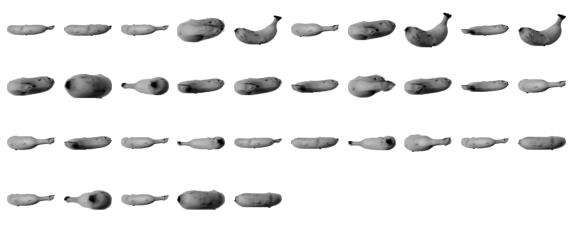

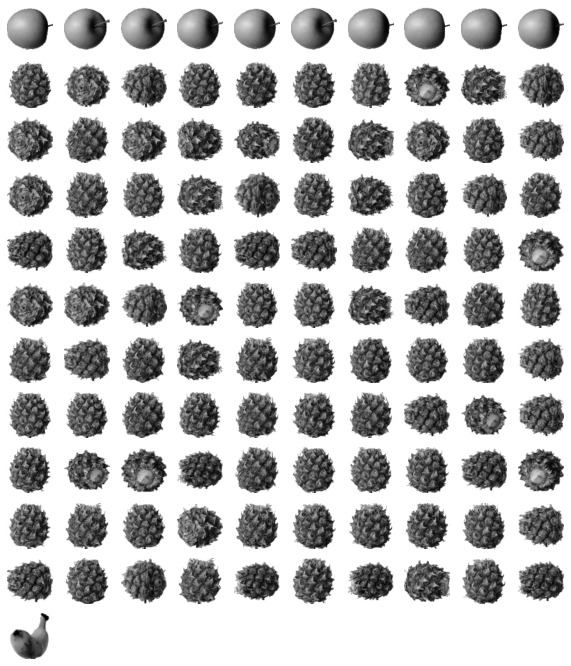

In [48]:
# 클러스터 0번값으로 이미지 출력하기
draw_fruits(fruits[km.labels_ == 0])

# 클러스터 1번값으로 이미지 출력하기
draw_fruits(fruits[km.labels_ == 1])

# 클러스터 2번값으로 이미지 출력하기
draw_fruits(fruits[km.labels_ == 2])

## 클러스터 중심

In [49]:
# - K-means 모델이 최종적으로 찾은 클러스터의 중심값은
# - cluster_centers_ 속성에 저장되어 있습니다. (2차원)
# - 이미지로 출력하면서 100 * 100 크기의 2차원 배열로 바꿔야 합니다.

# 클러스터 중심값 확인하기
km.cluster_centers_

array([[1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.15625   , 1.109375  , 1.15625   , ..., 1.        , 1.        ,
        1.        ]])

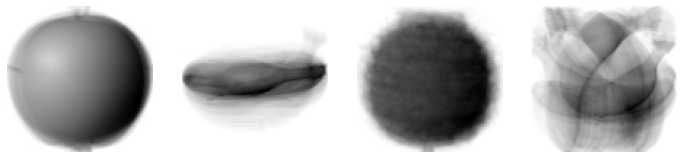

In [50]:
# 100 * 100의 값으로 재배열해서 이미지 출력하기
# 각 샘플들의 평균값
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio =3)

In [39]:
# 클러스터 중심에서 각 샘플까지의 거리 조회하기
print(km.transform(fruits_2d[100 : 101]))

[[3393.8136117  8837.37750892 5267.70439881]]


In [40]:
print(km.predict(fruits_2d[100:101]))

[0]


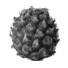

In [41]:
draw_fruits(fruits[100:101])

In [42]:
### 훈련횟수 조회하기
print(km.n_iter_)

4


## 클러스터의 갯수 K 값 찾아보기

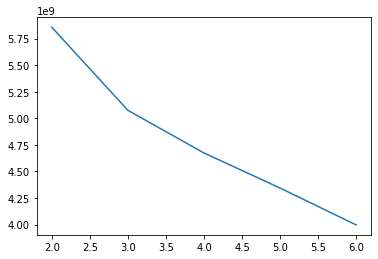

In [52]:
inertia = []

for k in range(2,7) :
    km = KMeans(n_clusters = k, random_state = 42)
    
    # 훈련모델 생성하기
    km.fit(fruits_2d)
    
    # km.inertia_ : 관성이라고 합니다.
    inertia.append(km.inertia_)
    
plt.plot(range(2,7) , inertia)
plt.show()

# 관성이 변화하는 시점이 k값 입니다.
# 즉, 꺽이는 부분...
# 패턴이 변화하는 시점
